# Data

## Build Dataset

In [ ]:
import pandas as pd

ids = pd.read_csv('data_all_post_ids.csv')

In [ ]:
ids.head()

,inspiring,not inspiring
0,18ypya,5s6czm
1,8u3p2f,2q1xjz
2,194wmf,16ff5p
3,1h8ctp,18fto4
4,17pkxd,671m2n


In [ ]:
inspiring=ids['inspiring']
not_inspiring=ids['not inspiring']

In [ ]:
inspiring = pd.DataFrame(inspiring).assign(result = 1)
not_inspiring = pd.DataFrame(not_inspiring).assign(result = 0)

In [ ]:
inspiring = inspiring.rename(columns = {'inspiring':'id'})
not_inspiring = not_inspiring.rename(columns = {'not inspiring':'id'})

In [ ]:
df = inspiring.append(not_inspiring)

In [ ]:
len(df)

11590

In [ ]:
df.head()

,id,result
0,18ypya,1
1,8u3p2f,1
2,194wmf,1
3,1h8ctp,1
4,17pkxd,1


In [84]:
pip install praw

     |████████████████████████████████| 167 kB 5.3 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 


In [85]:
import praw

reddit = praw.Reddit(client_id='F77JkePeSXMBgL_u3m9CBQ',
                     client_secret='DgQrUlyRndRlDYapNRD6GcOr_D_Vsg',
                     user_agent='smm_project_21',
                     check_for_async=False)

submissions = reddit.subreddit('opensource').hot(limit=5)
[str(x) for x in submissions]

['ql8hv2', 'ql10du', 'qlc9nr', 'qleahv', 'qldd4o']

In [ ]:
submission = reddit.submission(id='qkdl0k')

In [ ]:
submission.title

'Why do you follow people on GitHub?'

In [ ]:
submission.selftext

"I'm curious about why people follow others on GitHub.\n\nI follow people so that I get to know of any new projects they are working on or what projects they are exploring. (From new repos and new stars)\n\nWhy do you follow people? Are there any other reasons?\n\nI also asked this on [Twitter](https://twitter.com/sudo_navendu/status/1455158764403716102)."

In [ ]:
list_of_ids = list(df['id'])

In [ ]:
list_of_titles = []
error_count = 0
i = 0
for x in list_of_ids:
  try:
    list_of_titles.append(reddit.submission(id = x).title)
  except:
    list_of_titles.append('error')
    error_count += 1
    print(f"Error number {error_count} just occured.")
  i += 1
  if i % 250 == 0:
    print(f"Just finished ID # {i}")

In [ ]:
from google.colab import files

id_df = pd.DataFrame(list_of_ids)
title_df = pd.DataFrame(list_of_titles)

id_df.to_csv('id_df.csv')
title_df.to_csv('title_df.csv')

files.download('id_df.csv')
files.download('title_df.csv')

In [ ]:
list_of_content = []
error_count = 0
i = 0
for x in list_of_ids:
  try:
    list_of_content.append(reddit.submission(id = x).selftext)
  except:
    list_of_content.append('error')
    error_count += 1
    print(f"Error number {error_count} just occured.")
  i += 1
  if i % 250 == 0:
    print(f"Just finished ID # {i}")

In [ ]:
content_df = pd.DataFrame(list_of_content)
content_df.to_csv('content_df.csv')
files.download('content_df.csv')

## Load Data

In [1]:
import io
import requests
import pandas as pd

#ID DataFrame
id_df=pd.read_csv('id_df.csv', header=None)

#Title DataFrame
title_df=pd.read_csv('title_df.csv', header=None)

#Content DataFrame
content_df=pd.read_csv('content_df.csv', header=None)

In [2]:
df = pd.DataFrame(columns=['id', 'Title', 'Content'])

In [3]:
len(content_df)

11593

In [4]:
df['id'] = id_df[1]
df['Title'] = title_df[1]
df['Content'] = content_df[1]

In [5]:
df.sample()

,id,Title,Content
11491,5w7x69,"Uplifted purifiers. Now, our of everyone in th...",Even these two empires who are perfectly oppos...


In [42]:
#1=Inspiring
#0=Not Inspiring

result_df = pd.read_csv('ids_and_titles.csv')
result_df = result_df.drop(columns=['Unnamed: 0','title'])
result_df.result = result_df.result.astype(int)

In [43]:
new_df = df.merge(result_df, on='id', how='outer')
new_df = new_df.drop_duplicates()

In [44]:
new_df = new_df.dropna()

In [45]:
new_df.result = new_df.result.astype(int)

In [46]:
#Verify that the rows are matched properly
new_df.sample()

,id,Title,Content,result
16123,16r1lu,"If Karma was like dollars, how much would you ...",[deleted],1


In [47]:
import praw

reddit = praw.Reddit(client_id='F77JkePeSXMBgL_u3m9CBQ',
                     client_secret='DgQrUlyRndRlDYapNRD6GcOr_D_Vsg',
                     user_agent='smm_project_21',
                     check_for_async=False)

sub = reddit.submission(id = '16r1lu')

ModuleNotFoundError: ignored

In [ ]:
sub.selftext

In [ ]:
sub.title

## Clean Data

In [48]:
final_df = new_df[new_df.Title != 'error']

In [50]:
len(final_df)

6946

# Bert

In [51]:
# install
!pip install pytorch-pretrained-bert pytorch-nlp

# BERT imports
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


In [53]:
query_data_train = list(final_df.Title)
len(query_data_train)

6946

In [54]:
sentences = ["[CLS] " + query + " [SEP]" for query in query_data_train]
print(sentences[0])

# Tokenize with BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

[CLS] Fellow ents, don't be sad! [SEP]
Tokenize the first sentence:
['[CLS]', 'fellow', 'en', '##ts', ',', 'don', "'", 't', 'be', 'sad', '!', '[SEP]']


In [55]:
# Set the maximum sequence length. 
MAX_LEN = 128
# Pad our input tokens
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [56]:
# Create attention masks
attention_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

In [57]:
labels = np.array(final_df.result)

In [58]:
len(labels)

6946

In [59]:
# Use train_test_split to split our data into train and validation sets for training
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)
                                             
# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

# Select a batch size for training. 
batch_size = 32

# Create an iterator of our data with torch DataLoader 
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [60]:
# specify GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top. 

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.cuda()

# BERT model summary
'''
BertForSequenceClassification(
    (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1)
            )
          )
          (intermediate): BertIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
          )
          (output): BertOutput(
            (dense): Linear(in_features=3072, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1)
          )
        )
        '
        '
        '
      )
    )
    (pooler): BertPooler(
      (dense): Linear(in_features=768, out_features=768, bias=True)
      (activation): Tanh()
    )
  )
  (dropout): Dropout(p=0.1)
  (classifier): Linear(in_features=768, out_features=2, bias=True)
)
'''

"\nBertForSequenceClassification(\n    (bert): BertModel(\n    (embeddings): BertEmbeddings(\n      (word_embeddings): Embedding(30522, 768, padding_idx=0)\n      (position_embeddings): Embedding(512, 768)\n      (token_type_embeddings): Embedding(2, 768)\n      (LayerNorm): BertLayerNorm()\n      (dropout): Dropout(p=0.1)\n    )\n    (encoder): BertEncoder(\n      (layer): ModuleList(\n        (0): BertLayer(\n          (attention): BertAttention(\n            (self): BertSelfAttention(\n              (query): Linear(in_features=768, out_features=768, bias=True)\n              (key): Linear(in_features=768, out_features=768, bias=True)\n              (value): Linear(in_features=768, out_features=768, bias=True)\n              (dropout): Dropout(p=0.1)\n            )\n            (output): BertSelfOutput(\n              (dense): Linear(in_features=768, out_features=768, bias=True)\n              (LayerNorm): BertLayerNorm()\n              (dropout): Dropout(p=0.1)\n            )\n     

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pytorch_pretrained_bert/optimization.py:275: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:1025.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


Train loss: 0.6364466125259594


Epoch:  25%|██▌       | 1/4 [01:51<05:35, 111.91s/it]

Validation Accuracy: 0.6614995059288538
Train loss: 0.5157344288059643


Epoch:  50%|█████     | 2/4 [03:43<03:43, 111.78s/it]

Validation Accuracy: 0.640130928853755
Train loss: 0.3644474558532238


Epoch:  75%|███████▌  | 3/4 [05:36<01:52, 112.07s/it]

Validation Accuracy: 0.6489624505928854
Train loss: 0.2422700308985552


Epoch: 100%|██████████| 4/4 [07:28<00:00, 112.16s/it]

Validation Accuracy: 0.6450098814229249


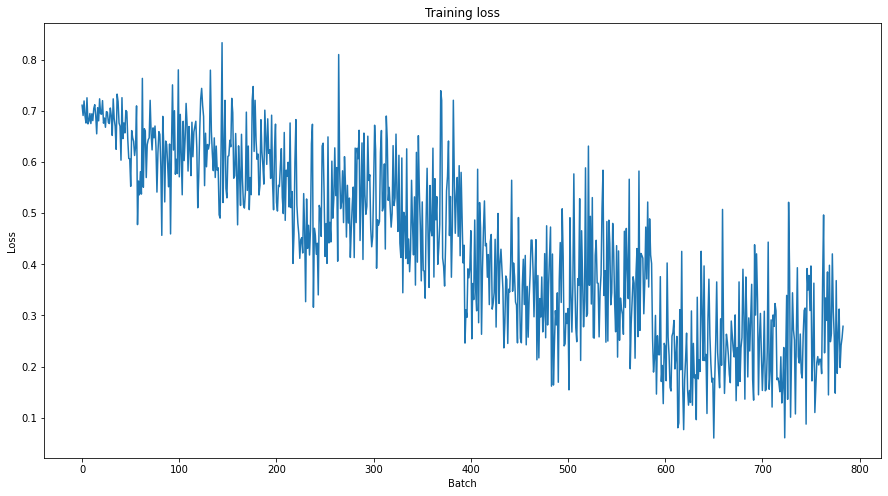

In [61]:
# BERT fine-tuning parameters
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = BertAdam(optimizer_grouped_parameters,
                     lr=2e-5,
                     warmup=.1)

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)
  
# Store our loss and accuracy for plotting
train_loss_set = []
# Number of training epochs 
epochs = 4

# BERT training loop
for _ in trange(epochs, desc="Epoch"):  
  
  ## TRAINING
  
  # Set our model to training mode
  model.train()  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()
    # Forward pass
    loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    train_loss_set.append(loss.item())    
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1
  print("Train loss: {}".format(tr_loss/nb_tr_steps))
       
  ## VALIDATION

  # Put model in evaluation mode
  model.eval()
  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0
  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)    
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1
  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()